In [1]:
import os.path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import TargetEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier

## Missing Values

In [2]:
print(os.path.exists("../data/dataset.csv"))
ds = pd.read_csv("../data/dataset.csv")
print("Any missing sample in training set:",ds.isnull().values.any())


True
Any missing sample in training set: True


In [3]:
print("Any missing sample in training set:",ds.isnull().values.any())

Any missing sample in training set: True


In [4]:
print('Missing data in:')
missing = list()
for x in ds.columns:
    if ds[x].isnull().sum() != 0:
        print(x, (ds[x].isnull().sum()/len(ds)))
        missing.append(x)

Missing data in:
track_name 0.00015228581000822344
track_artist 0.00015228581000822344
track_album_name 0.00015228581000822344


In [5]:
## оскільки кількість пропущених даних дуже мала відносно датасету, їх можемо видалити
ds = ds.dropna()

## Adding Features

In [6]:

date_formats = ['%Y', '%d/%m/%Y', '%Y-%m', '%m/%d/%Y', '%Y-%m', '%m/%Y', '%Y-%m-%d', '%m/%Y', '%Y-%m-%d']
years = []

for release_date in ds['track_album_release_date']:
    year_found = False

    for date_format in date_formats:
        try:
            year = pd.to_datetime(release_date, format=date_format).year
            ds['year'] = year
            year_found = True
            years.append(year)
            #print(t.year)
            break
        except ValueError:
            pass 
    if not year_found:
        years.append(None)

ds['year'] = years

In [9]:
## переводимо мілісекунди у секунди

def milliseconds_to_seconds(val):
    return val/1000

def seconds_to_minutes(val):
    return val/60

ds['duration_s'] = ds['duration_ms'].apply(milliseconds_to_seconds)
ds['duration_m'] = ds['duration_s'].apply(seconds_to_minutes)

display(ds.head(10))

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,year,duration_s,duration_m
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,6/14/2019,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754,2019,194.754,3.245900
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),12/13/2019,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600,2019,162.600,2.710000
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),7/5/2019,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616,2019,176.616,2.943600
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,7/19/2019,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093,2019,169.093,2.818217
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),3/5/2019,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052,2019,189.052,3.150867
5,7fvUMiyapMsRRxr07cU8Ef,Beautiful People (feat. Khalid) - Jack Wins Remix,Ed Sheeran,67,2yiy9cd2QktrNvWC2EUi0k,Beautiful People (feat. Khalid) [Jack Wins Remix],7/11/2019,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,0.1270,0.0799,0.000000,0.1430,0.585,124.982,163049,2019,163.049,2.717483
6,2OAylPUDDfwRGfe0lYqlCQ,Never Really Over - R3HAB Remix,Katy Perry,62,7INHYSeusaFlyrHSNxm8qH,Never Really Over (R3HAB Remix),7/26/2019,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,0.0623,0.1870,0.000000,0.1760,0.152,112.648,187675,2019,187.675,3.127917
7,6b1RNvAcJjQH73eZO4BLAB,Post Malone (feat. RANI) - GATTÜSO Remix,Sam Feldt,69,6703SRPsLkS4bPtMFFJes1,Post Malone (feat. RANI) [GATTÜSO Remix],8/29/2019,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,0.0434,0.0335,0.000005,0.1110,0.367,127.936,207619,2019,207.619,3.460317
8,7bF6tCO3gFb8INrEDcjNT5,Tough Love - Tiësto Remix / Radio Edit,Avicii,68,7CvAfGvq4RlIwEbT9o8Iav,Tough Love (Tiësto Remix),6/14/2019,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,0.0565,0.0249,0.000004,0.6370,0.366,127.015,193187,2019,193.187,3.219783
9,1IXGILkPm0tOCNeq00kCPa,If I Can't Have You - Gryffin Remix,Shawn Mendes,67,4QxzbfSsVryEQwvPFEV5Iu,If I Can't Have You (Gryffin Remix),6/20/2019,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,0.0320,0.0567,0.000000,0.0919,0.590,124.957,253040,2019,253.040,4.217333


## Handling Anomalies

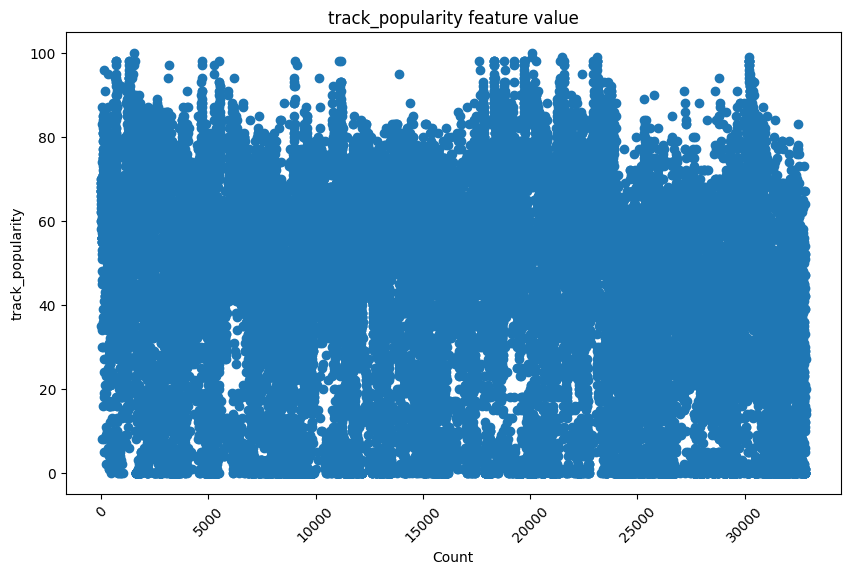

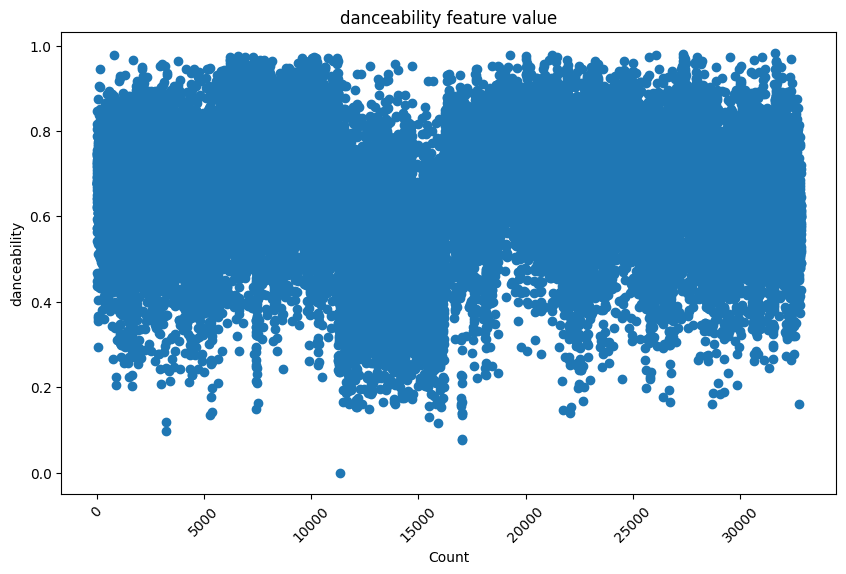

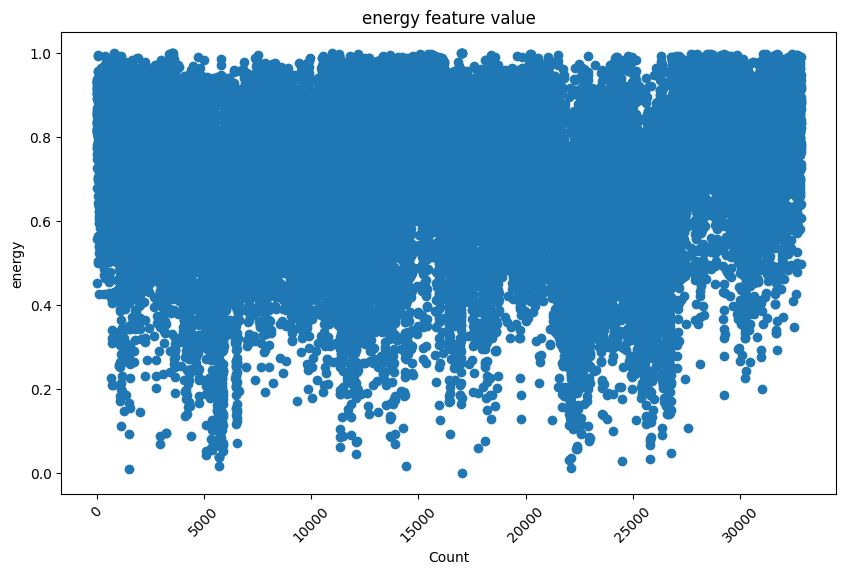

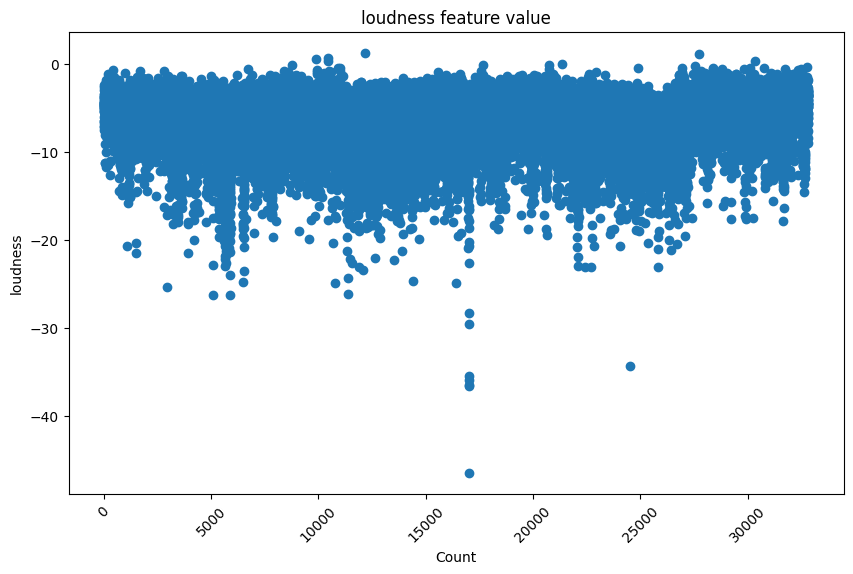

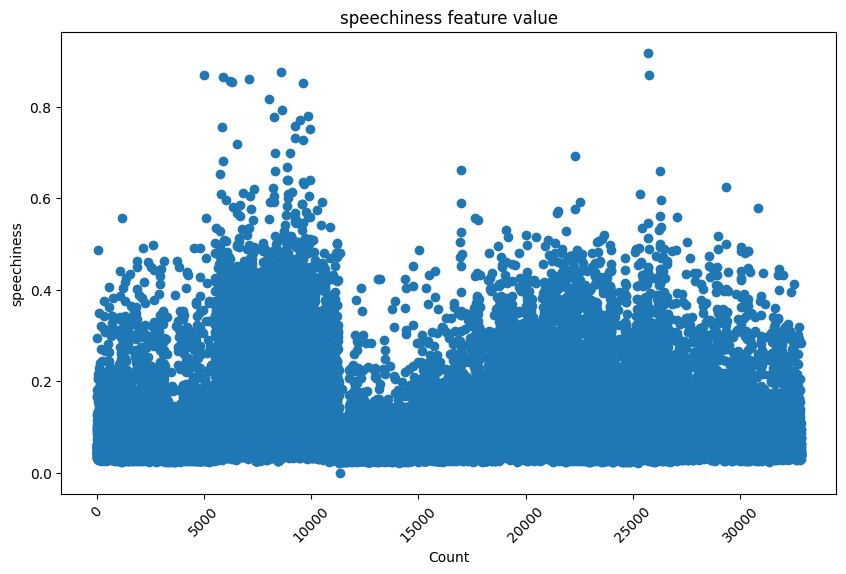

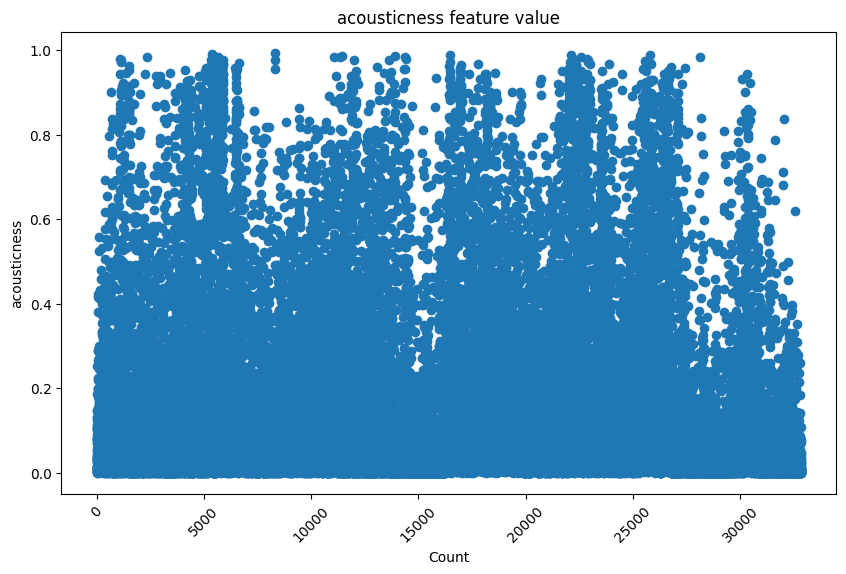

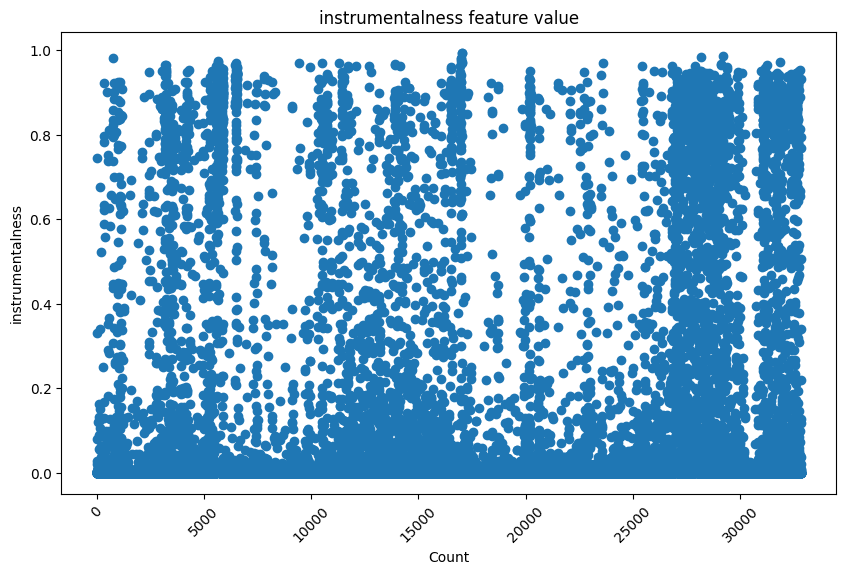

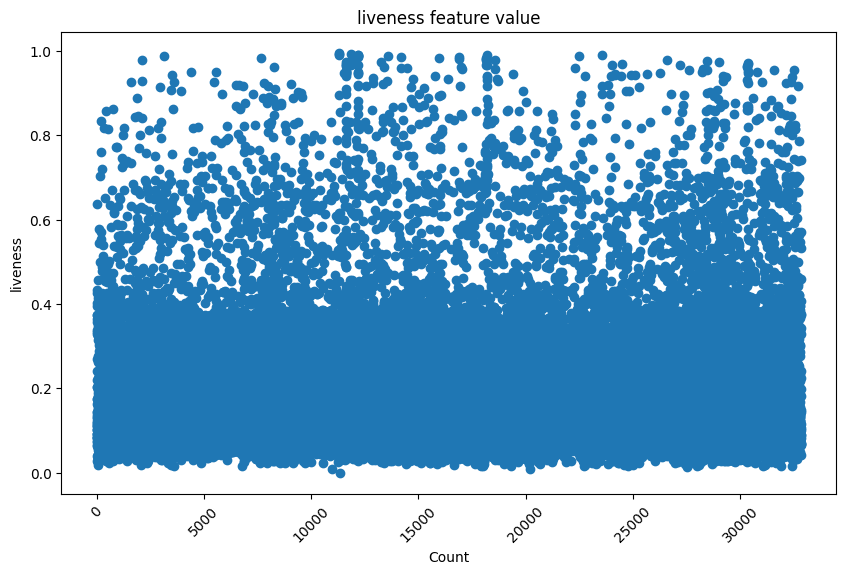

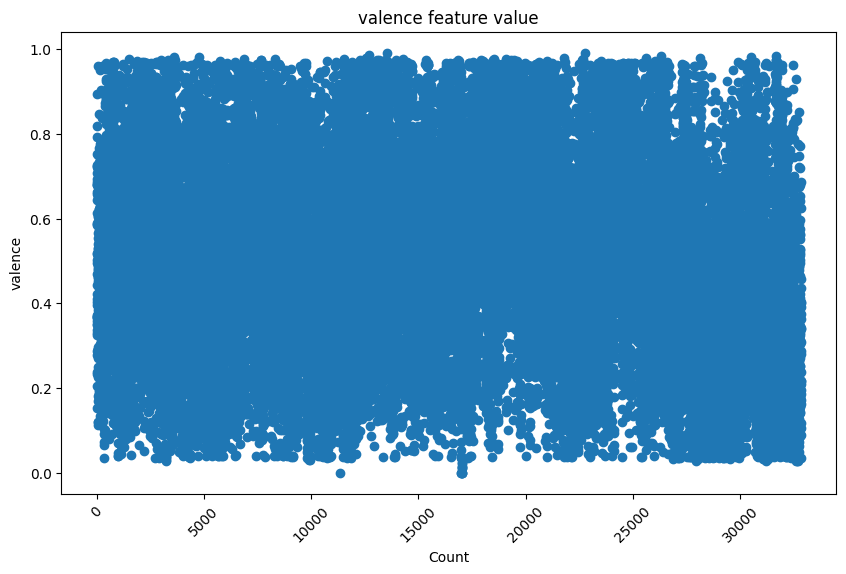

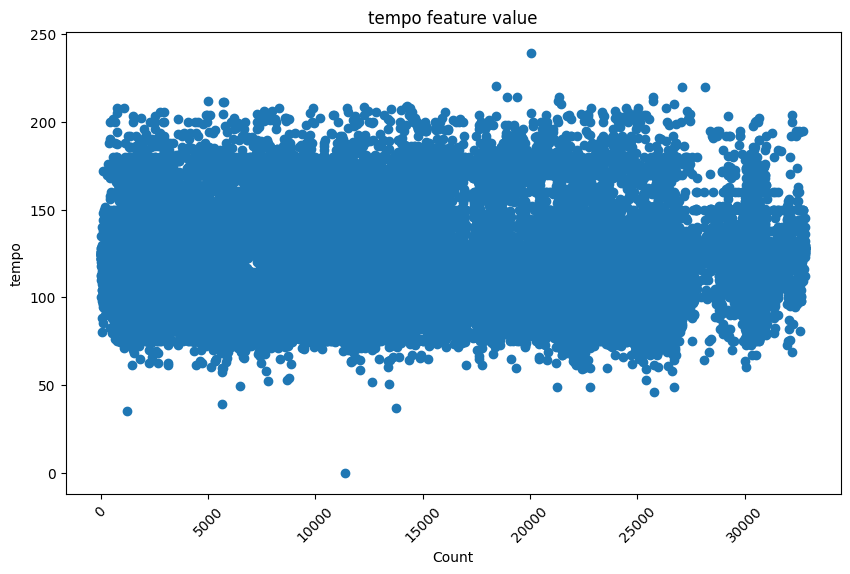

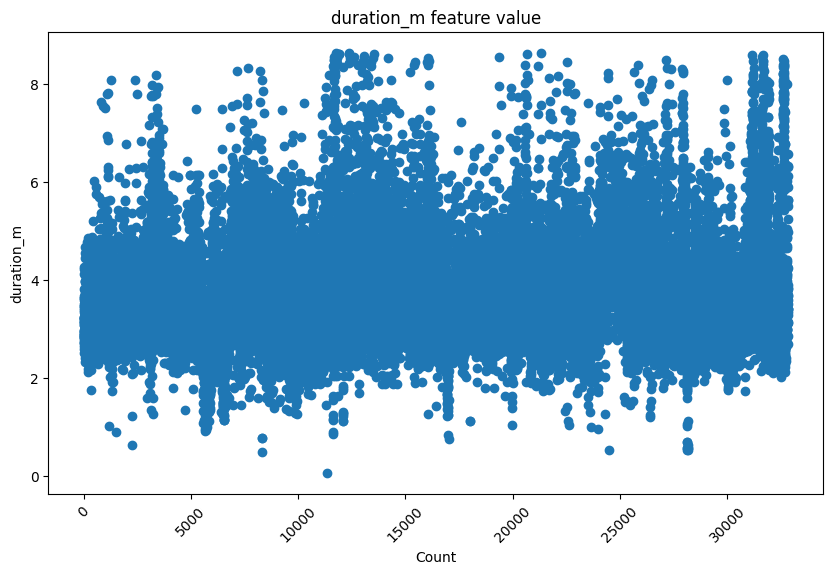

In [13]:
# визначимо чи є аномалії
columns = ['track_popularity', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_m']

for col in columns:
    values = ds[col]
    
    plt.figure(figsize=(10, 6))
    plt.scatter(ds.index, ds[col], marker='o')
    plt.title(f"{col} feature value")
    plt.ylabel(col)
    plt.xlabel("Count")
    plt.xticks(rotation=45)
    plt.show()

In [24]:
ds.describe()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,year,duration_s,duration_m
count,32828.000000,32828.000000,32828.000000,32828.000000,32828.000000,32828.000000,32828.000000,32828.000000,32828.000000,32828.000000,32828.000000,32828.000000,32828.000000,32828.000000,32828.000000,32828.000000
mean,42.483551,0.654850,0.698603,5.373949,-6.719529,0.565737,0.107053,0.175352,0.084760,0.190175,0.510556,120.883642,225796.829779,2011.136834,225.796830,3.763280
std,24.980476,0.145092,0.180916,3.611572,2.988641,0.495667,0.101307,0.219644,0.224245,0.154313,0.233152,26.903632,59836.492346,11.418226,59.836492,0.997275
min,0.000000,0.000000,0.000175,0.000000,-46.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4000.000000,1957.000000,4.000000,0.066667
25%,24.000000,0.563000,0.581000,2.000000,-8.171250,0.000000,0.041000,0.015100,0.000000,0.092700,0.331000,99.961000,187804.500000,2008.000000,187.804500,3.130075
50%,45.000000,0.672000,0.721000,6.000000,-6.166000,1.000000,0.062500,0.080400,0.000016,0.127000,0.512000,121.984000,216000.000000,2016.000000,216.000000,3.600000
75%,62.000000,0.761000,0.840000,9.000000,-4.645000,1.000000,0.132000,0.255000,0.004830,0.248000,0.693000,133.918250,253581.250000,2019.000000,253.581250,4.226354
max,100.000000,0.983000,1.000000,11.000000,1.275000,1.000000,0.918000,0.994000,0.994000,0.996000,0.991000,239.440000,517810.000000,2020.000000,517.810000,8.630167


## Categorical Data Encoding

In [25]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32828 entries, 0 to 32832
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32828 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32828 non-null  int64  
 4   track_album_id            32828 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32828 non-null  object 
 7   playlist_name             32828 non-null  object 
 8   playlist_id               32828 non-null  object 
 9   playlist_genre            32828 non-null  object 
 10  playlist_subgenre         32828 non-null  object 
 11  danceability              32828 non-null  float64
 12  energy                    32828 non-null  float64
 13  key                       32828 non-null  int64  
 14  loudness   

In [26]:
print('columns: ',list(ds.columns))

columns:  ['track_id', 'track_name', 'track_artist', 'track_popularity', 'track_album_id', 'track_album_name', 'track_album_release_date', 'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'year', 'duration_s', 'duration_m']


In [27]:
cols_to_encode = ['track_id', 'track_name', 'track_artist', 'track_album_id', 'track_album_name', 
                  'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre']

label_encoder = LabelEncoder()

for c in cols_to_encode:
    ds[c + '_encoded'] = label_encoder.fit_transform(ds[c])

display(ds.head(10))

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,duration_m,track_id_encoded,track_name_encoded,track_artist_encoded,track_album_id_encoded,track_album_name_encoded,playlist_name_encoded,playlist_id_encoded,playlist_genre_encoded,playlist_subgenre_encoded
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,6/14/2019,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,3.245900,24146,8897,2782,8225,7612,292,235,2,3
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),12/13/2019,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,2.710000,3061,12519,6084,17649,10408,292,235,2,3
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),7/5/2019,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,2.943600,7219,923,10416,3798,983,292,235,2,3
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,7/19/2019,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,2.818217,25695,3019,9215,5293,2796,292,235,2,3
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),3/5/2019,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,3.150867,5987,17909,5402,21934,14841,292,235,2,3
5,7fvUMiyapMsRRxr07cU8Ef,Beautiful People (feat. Khalid) - Jack Wins Remix,Ed Sheeran,67,2yiy9cd2QktrNvWC2EUi0k,Beautiful People (feat. Khalid) [Jack Wins Remix],7/11/2019,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,2.717483,27084,1918,2782,8723,1849,292,235,2,3
6,2OAylPUDDfwRGfe0lYqlCQ,Never Really Over - R3HAB Remix,Katy Perry,62,7INHYSeusaFlyrHSNxm8qH,Never Really Over (R3HAB Remix),7/26/2019,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,3.127917,8663,13475,4897,21173,11221,292,235,2,3
7,6b1RNvAcJjQH73eZO4BLAB,Post Malone (feat. RANI) - GATTÜSO Remix,Sam Feldt,69,6703SRPsLkS4bPtMFFJes1,Post Malone (feat. RANI) [GATTÜSO Remix],8/29/2019,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,3.460317,23916,15370,8189,17793,12784,292,235,2,3
8,7bF6tCO3gFb8INrEDcjNT5,Tough Love - Tiësto Remix / Radio Edit,Avicii,68,7CvAfGvq4RlIwEbT9o8Iav,Tough Love (Tiësto Remix),6/14/2019,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,3.219783,26816,20444,743,20927,17410,292,235,2,3
9,1IXGILkPm0tOCNeq00kCPa,If I Can't Have You - Gryffin Remix,Shawn Mendes,67,4QxzbfSsVryEQwvPFEV5Iu,If I Can't Have You (Gryffin Remix),6/20/2019,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,4.217333,4724,9491,8410,12929,7908,292,235,2,3


## Standartization and Normalization

In [29]:
print('columns: ',list(ds.columns))

columns:  ['track_id', 'track_name', 'track_artist', 'track_popularity', 'track_album_id', 'track_album_name', 'track_album_release_date', 'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'year', 'duration_s', 'duration_m', 'track_id_encoded', 'track_name_encoded', 'track_artist_encoded', 'track_album_id_encoded', 'track_album_name_encoded', 'playlist_name_encoded', 'playlist_id_encoded', 'playlist_genre_encoded', 'playlist_subgenre_encoded']


In [30]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

cls = ['track_popularity', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'duration_s', 'duration_m']
ds[cls] = scaler.fit_transform(ds[cls])


## Remove duplicates

In [31]:
ds.shape

(32828, 35)

In [32]:
ds.nunique()

track_id                     28352
track_name                   23448
track_artist                 10692
track_popularity               101
track_album_id               22543
track_album_name             19741
track_album_release_date      4529
playlist_name                  449
playlist_id                    471
playlist_genre                   6
playlist_subgenre               24
danceability                   822
energy                         952
key                             12
loudness                     10222
mode                             2
speechiness                   1270
acousticness                  3731
instrumentalness              4729
liveness                      1624
valence                       1362
tempo                        17682
duration_ms                  19782
year                            63
duration_s                   19782
duration_m                   19782
track_id_encoded             28352
track_name_encoded           23448
track_artist_encoded

In [33]:
nds = ds.drop_duplicates(subset=['track_id'])

print("Почищений датасет", nds.shape)

Почищений датасет (28352, 35)


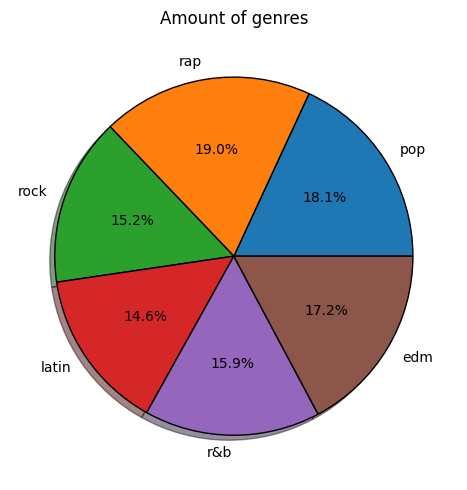

In [35]:
plt.rcParams["figure.figsize"] = (7,5)
cols = ['pop', 'rap', 'rock', 'latin', 'r&b', 'edm']

slices=[]
labels=[]

for o in cols:
    slices.append(len(nds[(nds['playlist_genre']==o)]))
    labels.append(o)

plt.pie(slices,labels=labels,wedgeprops={'edgecolor':'black'},shadow=True,autopct='%1.1f%%')
plt.title("Amount of genres")
plt.tight_layout()
plt.show()

#### Save dataset

In [34]:

cols_to_drop = ['track_id', 'track_name', 'track_artist', 'track_album_id', 'track_album_name', 
                  'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre', 'track_album_release_date']
new_ds = nds.drop(columns=cols_to_drop)

new_ds.info()
new_ds.to_csv("../data/preprocessed.csv")

<class 'pandas.core.frame.DataFrame'>
Index: 28352 entries, 0 to 32832
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   track_popularity           28352 non-null  float64
 1   danceability               28352 non-null  float64
 2   energy                     28352 non-null  float64
 3   key                        28352 non-null  int64  
 4   loudness                   28352 non-null  float64
 5   mode                       28352 non-null  int64  
 6   speechiness                28352 non-null  float64
 7   acousticness               28352 non-null  float64
 8   instrumentalness           28352 non-null  float64
 9   liveness                   28352 non-null  float64
 10  valence                    28352 non-null  float64
 11  tempo                      28352 non-null  float64
 12  duration_ms                28352 non-null  float64
 13  year                       28352 non-null  int64  
